# 4 - Validation - Reproduce Cumulative Installations and Waste from Heath 2020

This journal will reproduce the results from Garvin Heath & Tim Silverman's paper 2020. Plotting Cumulative Installations and Cumulative Waste, such that:

![Garvin Results](../images_wiki/GARVIN_2020.PNG)

Input is from IRENA projections:
![Input from IRENA_projections](../images_wiki/IRENA_projections.PNG)

Notes on IRENA Data:
- Installation Data < 2010 from D. Jordan
- Installation data >= 2010 from IRENA report


Other considerations:
  <ul> 
    <li> Global projected installations from IEA/IRENA (picture below). </li>
    <li> No recycling, no reuse, no repair.  </li>
    <li> 30-year average lifetime with early lifetime failures </li>
    <li> Power to Glass conversion: 76 t/MW </li>
</ul>

In [47]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [48]:
import PV_ICE

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

## REPAIR

In [50]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Garvin_2020', file=r'..\baselines\baseline_modules_World_Irena.csv')
r1.scenario['Garvin_2020'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

r1.createScenario(name='PV_ICE_default', file=r'..\baselines\baseline_modules_World.csv')
r1.scenario['PV_ICE_default'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')



path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [51]:
r1.scenario['Garvin_2020'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing'],
      dtype='object')

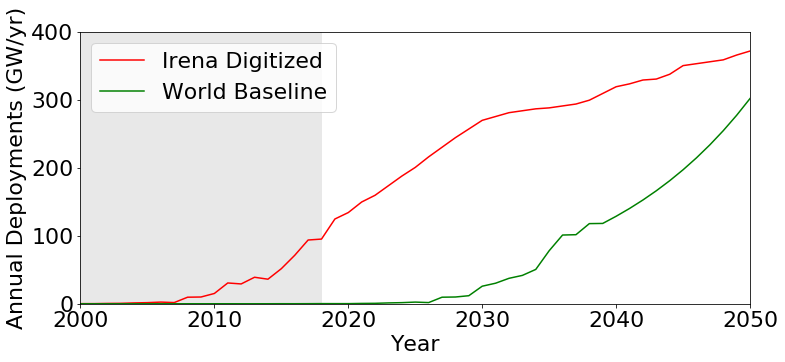

In [52]:
plt.plot(r1.scenario['Garvin_2020'].data['year'], r1.scenario['Garvin_2020'].data['new_Installed_Capacity_[MW]']/1000, 'r', label = 'Irena Digitized')
plt.plot(r1.scenario['PV_ICE_default'].data['year'], r1.scenario['PV_ICE_default'].data['new_Installed_Capacity_[MW]']/1000, 'g', label = 'World Baseline')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Annual Deployments (GW/yr)')
plt.xlim([2000, 2050])
plt.ylim([0, 400])
#plt.axhspan(200, 2018, facecolor='0.2', alpha=0.5)
plt.axvspan(2000, 2018, facecolor='0.9', alpha=0.9)

#plt.axvspan(2019, 2050, facecolor='0.2', alpha=0.5)


(0, 400)

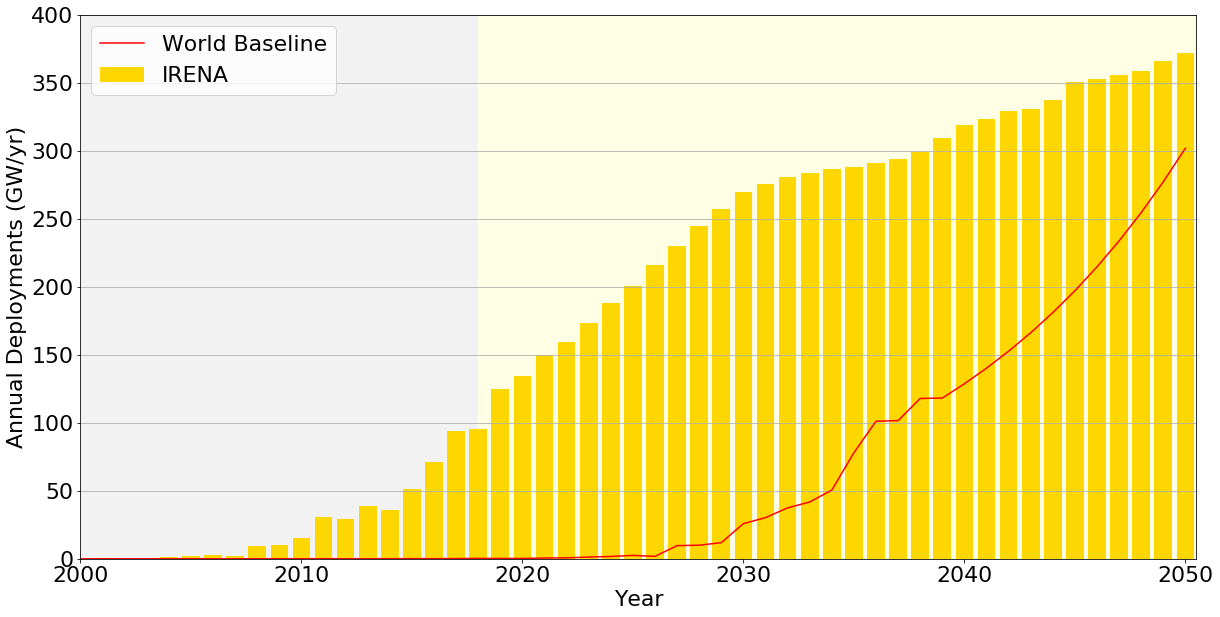

In [66]:
#fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax1.yaxis.grid()
plt.axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
plt.axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
ax1.bar(r1.scenario['Garvin_2020'].data['year'], r1.scenario['Garvin_2020'].data['new_Installed_Capacity_[MW]']/1000, color='gold', label='IRENA')
plt.plot(r1.scenario['PV_ICE_default'].data['year'], r1.scenario['PV_ICE_default'].data['new_Installed_Capacity_[MW]']/1000, 'r', label = 'World Baseline')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Annual Deployments (GW/yr)')
plt.xlim([2000, 2050.5])
plt.ylim([0, 400])


In [ ]:
r1.scenario['Garvin_2020'].data['mod_Repairing'] = 0
r1.scenario['PV_ICE_default'].data['mod_Repairing'] = 0

r1.scenario['Garvin_2020'].data['mod_reliability_t50'] = 25
r1.scenario['Garvin_2020'].data['mod_reliability_t90'] = 40

r1.scenario['PV_ICE_default'].data['mod_reliability_t50'] = 25
r1.scenario['PV_ICE_default'].data['mod_reliability_t90'] = 40

# Setting Project Lifetime beyond Failures
r1.scenario['Garvin_2020'].data['mod_lifetime'] = 40
r1.scenario['PV_ICE_default'].data['mod_lifetime'] = 40

In [ ]:
r1.calculateMassFlow()

In [ ]:
r1.scenario['Repair_0'].data.keys()

In [ ]:
AREA = r1.scenario['Repair_0'].data['Area'].iloc[0]

In [ ]:
filter_col = [col for col in r1.scenario['Repair_0'].data if col.startswith('EOL_on_Year_')]


In [ ]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r1.scenario['Repair_0'].data[filter_col[life]].iloc[0]
    foo2 += r1.scenario['Repair_50'].data[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 0%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 0%')
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0)
plt.plot(Cumul_EOL_R50)
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0)
plt.plot(Cumul_EOL_R50)
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.xlim([0,45])

In [ ]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

In [ ]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

## Reuse

Starting a Clean simulation

In [ ]:
r1 = PV_DEMICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Repower_0', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['Repower_0'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['Repower_0'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

r1.createScenario(name='Repower_50', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['Repower_50'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['Repower_50'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

In [ ]:
r1.scenario['Repower_0'].data['mod_Repowering'] = 0
r1.scenario['Repower_50'].data['mod_Repowering'] = 50
r1.scenario['Repower_50'].data['mod_Repowering'] = 50

r1.scenario['Repower_0'].data['mod_reliability_t50'] = 35
r1.scenario['Repower_0'].data['mod_reliability_t90'] = 45
r1.scenario['Repower_50'].data['mod_reliability_t50'] = 35
r1.scenario['Repower_50'].data['mod_reliability_t90'] = 45

# Setting Project Lifetime beyond Failures
r1.scenario['Repower_0'].data['mod_lifetime'] = 25
r1.scenario['Repower_50'].data['mod_lifetime'] = 25

In [ ]:
r1.calculateMassFlow()

In [ ]:
r1.scenario['Repower_50'].data.keys()

In [ ]:
AREA = r1.scenario['Repower_50'].data['Area'].iloc[0]

In [ ]:
filter_col = [col for col in r1.scenario['Repower_50'].data if col.startswith('EOL_on_Year_')]

In [ ]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r1.scenario['Repower_0'].data[filter_col[life]].iloc[0]
    foo2 += r1.scenario['Repower_50'].data[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.legend()
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.xlim([0,45])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

In [ ]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

In [ ]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')